<a href="https://colab.research.google.com/github/teazaw/MAT422-Mathematical-Methods-in-Data-Science/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2.4.1.Maximum Likelihood Estimation for Random Samples**
**Maximum likelihood estimation (MLE)** is a method used to estimate the parameters of a statistical model based on observed data. This is achieved through maximizing a likelihood function. The **maximum likelihood estimate** is the point in the paramter space that miximizes the likelihood function.

If *X1,...Xn* is a random sample from a normal distribution, then the likelihood function is:

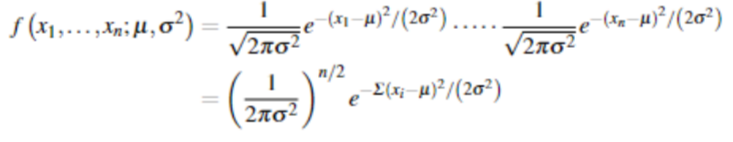

The resulting MLE's from the sample are:

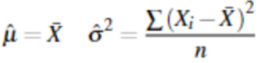

The code below demonstrates the process of deriving MLE's from a random sample with a normal distribution.

MLE for mu (the mean of the probability distribution): 4.79
MLE for sigma(the standard deviation of the errors): 1.81


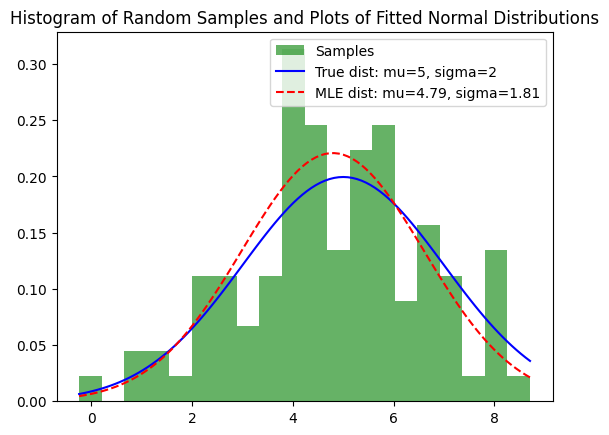

In [ ]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import norm
import matplotlib.pyplot as plt

np.random.seed(42)
true_mu = 5  # true mean
true_sigma = 2  # true standard deviation
sample_size = 100
samples = np.random.normal(loc=true_mu, scale=true_sigma, size=sample_size)

# negative log-likelihood function for normal distribution
def neg_log_likelihood(params, data):
    mu, sigma = params[0], params[1]
    if sigma <= 0:
        return np.inf
    nll = -np.sum(norm.logpdf(data, loc=mu, scale=sigma))
    return nll

# guess for parameters
initial_params = [0, 1]

# minimize the negative log-likelihood to find MLE
result = minimize(neg_log_likelihood, initial_params, args=(samples,), method='L-BFGS-B', bounds=[(None, None), (1e-6, None)])
mle_mu, mle_sigma = result.x

print(f"MLE for mu (the mean of the probability distribution): {mle_mu:.2f}")
print(f"MLE for sigma(the standard deviation of the errors): {mle_sigma:.2f}")


plt.hist(samples, bins=20, density=True, alpha=0.6, color='g', label='Samples')
x = np.linspace(min(samples), max(samples), 100)
plt.plot(x, norm.pdf(x, true_mu, true_sigma), 'b-', label=f'True dist: mu={true_mu}, sigma={true_sigma}')
plt.plot(x, norm.pdf(x, mle_mu, mle_sigma), 'r--', label=f'MLE dist: mu={mle_mu:.2f}, sigma={mle_sigma:.2f}')
plt.title('Histogram of Random Samples and Plots of Fitted Normal Distributions')
plt.legend()
plt.show()


# **2.4.2. Linear Regression**
**Linear regression** is a statistical method used to model and analyze the relationship between a dependent variable, also known as the target or response, and one or more independent variables, also called predictors. The goal of linear regression is to identify a relationship that can be used for explanation or prediction.
There are two main types of linear regression:
1.   **Simple Linear Regression**:

This examines the relationship between one independent variable *X* and one dependent variable *Y*. We assume that Y can be expressed as a linear function of X:

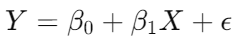

2.   **Multiple Linear Regression:**

Here, we model the relationship between dependent variable Y and multiple independent variables *X1, X2, X3*, etc. The general form of the model is:

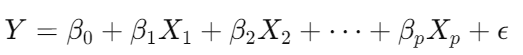



**There are five primary assumptions of linear regression:**
1. There is a linear relationship between the predictors (x) and the outcome (y)
2. Predictors (x) are independent and observed with negligible error
3. Residual Errors have a mean value of zero
4. Residual Errors have constant variance
5. Residual Errors are independent from each other and predictors (x)

For context, **residual errors** are differences between the observed values and the predicted values in a regression model.

MLE provides a framework for estimating the parameters of linear regression models. The code below determines the linear regression model between hours studied and exam scores using an MLE approach.

MLE Results: 
Intercept: 54.85115419640141
Slope: 4.040203489372442
Sigma (standard deviation of the errors): 8.28690676724676


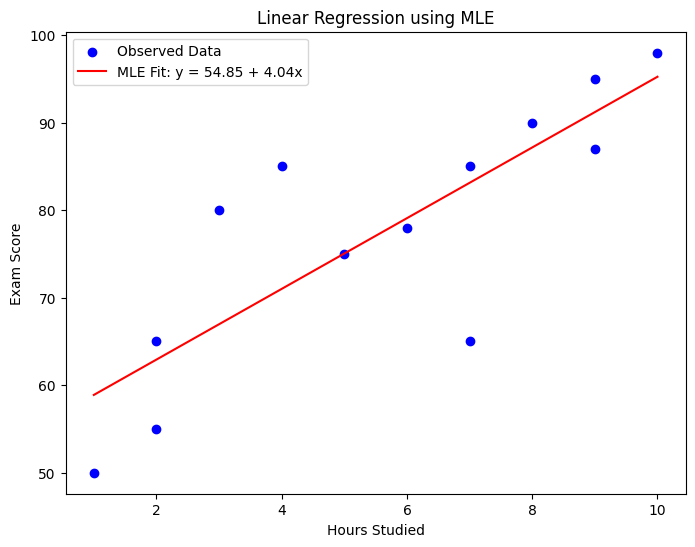

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

hours_studied = np.array([1, 2, 2, 3, 4, 5, 6, 7,7, 8, 9, 9, 10])
exam_scores = np.array([50, 55, 65, 80, 85, 75, 78, 65, 85, 90, 95, 87, 98])

# negative log-likelihood function for linear regression
def negative_log_likelihood(params, X, y):
    beta_0, beta_1, sigma = params[0], params[1], params[2]
    # predicted values of y
    y_pred = beta_0 + beta_1 * X

    # log-likelihood for normal distribution
    n = len(y)
    residuals = y - y_pred
    nll = 0.5 * n * np.log(2 * np.pi * sigma**2) + (1 / (2 * sigma**2)) * np.sum(residuals**2)
    return nll

#inital guess for parameters
initial_params = [0, 0, 1]

# find the MLE of parameters
result = minimize(negative_log_likelihood, initial_params, args=(hours_studied, exam_scores), method='L-BFGS-B',
                  bounds=[(-100, 100), (-100, 100), (1e-5, None)])
beta_0_mle, beta_1_mle, sigma_mle = result.x

print("MLE Results: ")
print(f"Intercept: {beta_0_mle}")
print(f"Slope: {beta_1_mle}")
print(f"Sigma (standard deviation of the errors): {sigma_mle}")
plt.figure(figsize=(8, 6))
plt.scatter(hours_studied, exam_scores, color='blue', label='Observed Data')
plt.plot(hours_studied, beta_0_mle + beta_1_mle * hours_studied, color='red', label=f'MLE Fit: y = {beta_0_mle:.2f} + {beta_1_mle:.2f}x')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Linear Regression using MLE')
plt.legend()
plt.show()

